<div style="border-radius: 15px; padding: 20px; background-color: #0B1E47; border: 3px solid #ffffff; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Unlocking Google Play Store</h1>
</div>


![](https://www.blackxperience.com/assets/content/blackattitude/blacktech/google-play-store-logo.jpg)

<a id="table"></a>
<h1 style="background-color: #0B1E47; color: #ffffff; font-family: 'Times New Roman', serif; font-size: 3.5em; text-align: center; padding: 10px; border: 3px solid #ffffff; border-radius: 15px 50px;">Table Of Content</h1>

<ul style="font-size: 1.5em;">
    <li><a href="#1">1. IMPORTING LIBRARIES</a></li>
    <li><a href="#2">2. LOADING DATASET</a></li>
    <li><a href="#3">3. EXPLORATORY DATA ANALYSIS</a></li>
    <li><a href="#4">4. DATA VISUALIZATION</a></li>
</ul>



<a id="1"></a>
<p style="padding: 10px; background-color: #0B1E47; color: #ffffff; font-family: 'Times New Roman', serif; font-size: 1.5em; text-align: center; border: 3px solid #ffffff; border-radius: 15px 50px; margin: 0; font-weight: 500;">IMPORTING LIBRARIES</p>


In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


encodings = ['utf-8', 'latin1', 'cp1252']
file = 'googleplaystore.csv.zip'

for encoding in encodings:
    try:
        df = pd.read_csv(file, encoding=encoding)
        print(f"Csv file successfully read with encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Failed to read CSV file with encoding: {encoding}")

Csv file successfully read with encoding: utf-8


In [2]:
# Hide all the warnings
import warnings
warnings.filterwarnings('ignore')

<a id="2"></a>
<p style="padding: 10px; background-color: #0B1E47; color: #ffffff; font-family: 'Times New Roman', serif; font-size: 1.5em; text-align: center; border: 3px solid #ffffff; border-radius: 15px 50px; margin: 0; font-weight: 500;">LOADING DATASET</p>


In [3]:
df = pd.read_csv('googleplaystore.csv.zip')

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
# to get to see all columns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [6]:
(df.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

<a id="3"></a>
<p style="padding: 10px; background-color: #0B1E47; color: #ffffff; font-family: 'Times New Roman', serif; font-size: 1.5em; text-align: center; border: 3px solid #ffffff; border-radius: 15px 50px; margin: 0; font-weight: 500;">EXPLORATORY DATA ANALYSIS</p>


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
df.shape

(10841, 13)

In [9]:
print(f'Number of rows : {df.shape[0]}')
print(f'Number of columns : {df.shape[1]}')

Number of rows : 10841
Number of columns : 13


In [10]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


###  How to make 'size' a numeric column

In [11]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

<div class="alert alert-block alert-warning" style="background-color: skyblue; color: black;">
  <h3>'Size' column Observations</h3>
  <p>1 . Varies with device</p>
  <p>2. k (kilo bytes)</p>
  <p>3. M (mega bytes)</p>
</div>

In [12]:
# checking if there is any missing values
df['Size'].isnull().sum()

0

<div style="padding:20px; 
            color:#36FF00;
            margin:10px;
            font-size:110%;
            display:fill;
            border-radius:10px;
            border-style: solid;
            border-color: #36FF00;
            background-color:#000000;
            overflow:hidden;
            font-weight:500">No missing values !</div>

In [13]:
# Find the values having 'M' in them
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

8829

In [14]:
# Find the values having 'k' in them
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

316

In [15]:
# Find the values having 'Varies with device' in them
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

1695

In [16]:
# Length of the dataframe
len(df['Size'])

10841

In [17]:
df['Size'].value_counts().sum()

10841

### Convert the whole 'Size' column into Bytes

<h2 align="center"> <font color='green'>Define a Function </font></h2>

In [18]:
def convert_size(size):
    if isinstance(size , str):
        if 'k' in size:
            return float(size.replace('k' , "")) * 1024
        elif 'M' in size:
            return float(size.replace('M' , "")) * 1024 * 1024
        elif 'Varies with device' in size:
            return np.nan
    return float(size) if isinstance(size, (int, float)) else np.nan   

In [19]:
df['Size'] = df['Size'].apply(convert_size)

In [20]:
df['Size'].unique()

array([1.99229440e+07, 1.46800640e+07, 9.12261120e+06, 2.62144000e+07,
       2.93601280e+06, 5.87202560e+06, 3.04087040e+07, 3.46030080e+07,
       3.25058560e+06, 2.93601280e+07, 1.25829120e+07, 2.09715200e+07,
       2.20200960e+07, 3.87973120e+07, 2.83115520e+06, 5.76716800e+06,
       1.78257920e+07, 4.08944640e+07, 3.25058560e+07, 4.40401920e+06,
       7.34003200e+06, 2.41172480e+07, 6.29145600e+06, 6.39631360e+06,
       4.82344960e+06, 9.64689920e+06, 5.45259520e+06, 1.15343360e+07,
       2.51658240e+07,            nan, 9.85661440e+06, 1.57286400e+07,
       1.04857600e+07, 1.25829120e+06, 2.72629760e+07, 8.38860800e+06,
       8.28375040e+06, 5.87202560e+07, 5.97688320e+07, 3.67001600e+07,
       5.66231040e+07, 2.05824000e+05, 3.77487360e+06, 5.97688320e+06,
       9.01775360e+06, 2.51658240e+06, 2.83115520e+07, 2.62144000e+06,
       1.67772160e+07, 3.56515840e+06, 9.33232640e+06, 4.08944640e+06,
       3.04087040e+06, 3.98458880e+07, 3.35544320e+07, 5.66231040e+06,
      

In [21]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,55574528.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3774873.6,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9961472.0,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19922944.0,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [22]:
df['Size'].dtype

dtype('float64')

In [23]:
# Rename the column
df.rename(columns={'Size': 'Size_in_bytes'}, inplace=True)

In [24]:
df.head(2)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [25]:
print(df['Size_in_bytes'].dtype)

float64


In [26]:
# making a new column for size in MB
df['Size_in_Mb'] = df['Size_in_bytes'].apply(lambda x : x/(1024*1024))

In [27]:
# making a new column for size in Kb
df['Size_in_Kb'] = df['Size_in_bytes'].apply(lambda x : x/(1024))

In [28]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_Kb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,19456.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,14336.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,8908.8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,25600.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,2867.2


In [29]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

<div class="alert alert-block alert-warning" style="background-color: skyblue; color: black;">
  <h3>Installs column</h3>
  <p>1. remove '+' sign</p>
  <p>2. remove comma(,)</p>
  <p>3. convert column to integer</p>
</div>


In [30]:
df['Installs'].isnull().sum()

0

<div style="padding:20px; 
            color:#36FF00;
            margin:10px;
            font-size:110%;
            display:fill;
            border-radius:10px;
            border-style: solid;
            border-color: #36FF00;
            background-color:#000000;
            overflow:hidden;
            font-weight:500">No missing values !</div>

In [31]:
# removing '+' sign
df['Installs'] = df['Installs'].apply(lambda x : x.replace('+','') if '+' in str(x) else x)

In [32]:
df['Installs'].value_counts()

Installs
1,000,000        1579
10,000,000       1252
100,000          1169
10,000           1054
1,000             907
5,000,000         752
100               719
500,000           539
50,000            479
5,000             477
100,000,000       409
10                386
500               330
50,000,000        289
50                205
5                  82
500,000,000        72
1                  67
1,000,000,000      58
0                  15
Free                1
Name: count, dtype: int64

In [33]:
# removing commas 
df['Installs'] = df['Installs'].apply(lambda x : x.replace(',' , '') if ',' in str(x) else x )

In [34]:
df['Installs'] = df['Installs'].replace('Free' , np.nan)

In [35]:
# converting into integer
df['Installs'] = df['Installs'].apply(lambda x : float(x))

In [36]:
df['Installs'].unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02,
       1.e+01, 1.e+00, 5.e+00, 0.e+00,    nan])

In [37]:
# imputing nan value with mode installs
df['Installs'] = df['Installs'].fillna(df['Installs'].mode()[0])

In [38]:
# checking if there is any nan value
df['Installs'].isna().sum()

0

In [39]:
# making new column called installs_category
bins = [-1,10,100,1000,10000,100000,1000000,10000000,100000000]
labels = ['No','Very low','Low','Moderate','More than moderate','High','Very high','Top notch']
df['Installs_category'] = pd.cut(df['Installs'],bins=bins,labels=labels)

In [40]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_Kb,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,19456.0,Moderate
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,14336.0,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,8908.8,Very high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,25600.0,Top notch
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,2867.2,More than moderate


In [41]:
df['Installs_category'].value_counts()

Installs_category
High                  2119
Very high             2004
More than moderate    1648
Moderate              1531
Low                   1237
Very low               924
Top notch              698
No                     550
Name: count, dtype: int64

In [42]:
df['Installs'].isna().sum()

0

In [43]:
# checking numerical columns
df.describe()

,Rating,Size_in_bytes,Installs,Size_in_Mb,Size_in_Kb
count,9367.000000,9.145000e+03,1.084100e+04,9145.000000,9145.000000
mean,4.193338,2.256133e+07,1.546300e+07,21.516165,22032.553406
std,0.537431,2.368637e+07,8.502555e+07,22.589084,23131.222364
min,1.000000,8.704000e+03,0.000000e+00,0.008301,8.500000
25%,4.000000,5.138022e+06,1.000000e+03,4.900000,5017.600000
50%,4.300000,1.363149e+07,1.000000e+05,13.000000,13312.000000
75%,4.500000,3.145728e+07,5.000000e+06,30.000000,30720.000000
max,19.000000,1.048576e+08,1.000000e+09,100.000000,102400.000000


In [44]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

<div class="alert alert-block alert-warning" style="background-color: skyblue; color: black;">
  <h3>Price column</h3>
  <p>1. remove '$' sign </p>
  <p>2. remove 'Everyone'</p>
  <p>3. convert column to integer</p>
</div>


In [45]:
# remove $ sign
df['Price'] = df['Price'].apply(lambda x : x.replace('$','') if '$' in str(x) else x )

In [46]:
# remove Everyone text
df['Price'] = df['Price'].replace('Everyone' , np.NaN)

In [47]:
# converting into integer
df['Price'] = df['Price'].apply(lambda x : float(x))

In [48]:
df['Price'].dtype

dtype('float64')

In [49]:
df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,    nan,   1.2 ,   1.04])

There is a nan value and we gotta impute/fill it

In [50]:
# checking How many nan values are there
df['Price'].isna().sum()

1

In [51]:
df['Price'].isna().values.any()

True

In [52]:
# imputing nan value with mode price
df['Price'] = df['Price'].fillna(df['Price'].mode()[0])

In [53]:
df['Price'].isna().sum()

0

In [54]:
df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

### Now, nan value got removed

In [55]:
df.tail()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_Kb,Installs_category
10836,Sya9a Maroc - FR,FAMILY,4.5,38,55574528.0,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,53.0,54272.0,Moderate
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3774873.6,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,3.6,3686.4,Very low
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9961472.0,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,9.5,9728.0,Low
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,NaN,NaN,Low
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19922944.0,10000000.0,Free,0.0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device,19.0,19456.0,Very high


In [56]:
print(f"Minimun Price is {df['Price'].min()}")
print(f"Maximun Price is {df['Price'].max()}")
print(f"Average Price is {df['Price'].mean()}")

Minimun Price is 0.0
Maximun Price is 400.0
Average Price is 1.0272733142699015


# missing values

In [57]:
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes        1696
Size_in_Mb           1696
Size_in_Kb           1696
Rating               1474
Installs_category     130
Current Ver             8
Android Ver             3
Type                    1
Content Rating          1
App                     0
Category                0
Reviews                 0
Installs                0
Price                   0
Genres                  0
Last Updated            0
dtype: int64

<div class="alert alert-block alert-danger" style="color:red;">
    <b>Missing Values Report:</b>
    <br>1. We have 1696 missing values in size_in_bytes, size_in_Mb, size_in_kb
    <br>2. We have 1474 missing values in ratings
    <br>3. We have 8 missing values in current_ver
    <br>4. We have 3 missing values in android_ver
    <br>5. We have 1 missing value in type and content rating
</div>


In [58]:
# percentage of missing values
round(df.isnull().sum()/len(df)*100 ,2).sort_values(ascending=False)

Size_in_bytes        15.64
Size_in_Mb           15.64
Size_in_Kb           15.64
Rating               13.60
Installs_category     1.20
Current Ver           0.07
Android Ver           0.03
Type                  0.01
Content Rating        0.01
App                   0.00
Category              0.00
Reviews               0.00
Installs              0.00
Price                 0.00
Genres                0.00
Last Updated          0.00
dtype: float64

<Axes: >

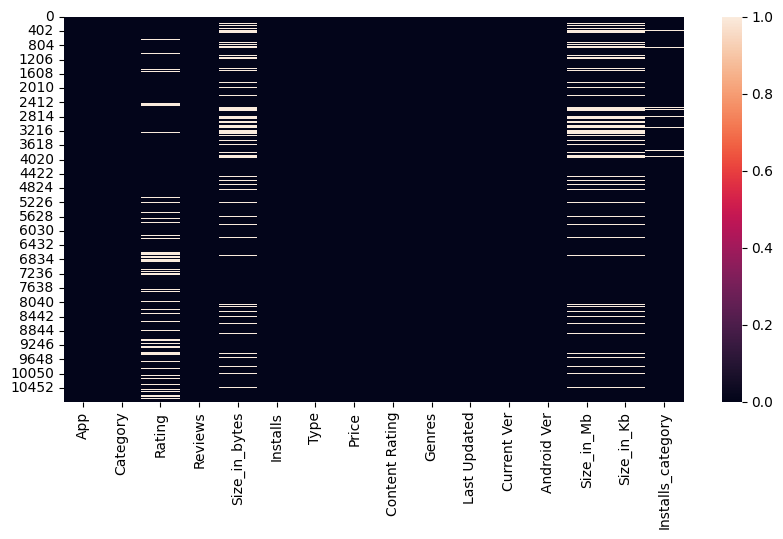

In [59]:
# Plot missing values
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())

Text(0.5, 1.0, 'Percentage of missing values in each column')

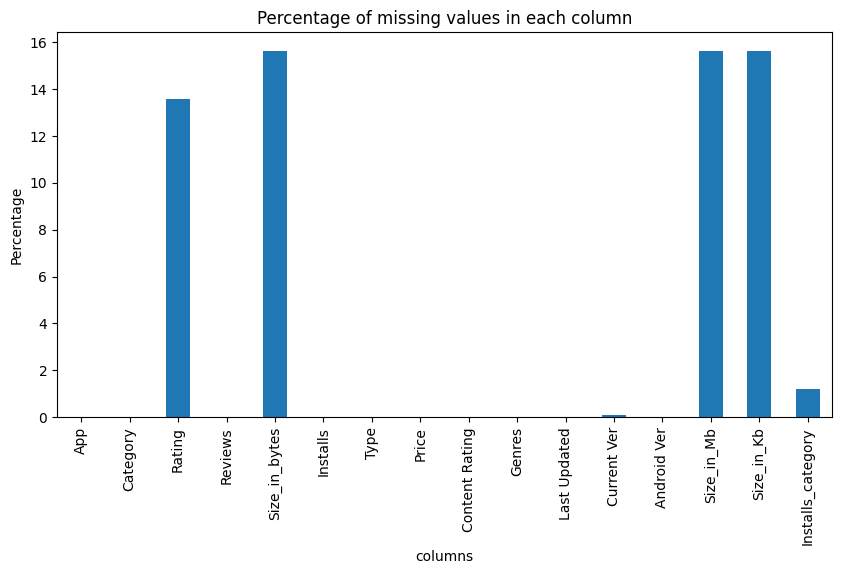

In [60]:
plt.figure(figsize=(10,5))
# plot the null values by percentage 
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')
plt.xlabel('columns')
plt.ylabel('Percentage')
plt.title('Percentage of missing values in each column')


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   App                10841 non-null  object  
 1   Category           10841 non-null  object  
 2   Rating             9367 non-null   float64 
 3   Reviews            10841 non-null  object  
 4   Size_in_bytes      9145 non-null   float64 
 5   Installs           10841 non-null  float64 
 6   Type               10840 non-null  object  
 7   Price              10841 non-null  float64 
 8   Content Rating     10840 non-null  object  
 9   Genres             10841 non-null  object  
 10  Last Updated       10841 non-null  object  
 11  Current Ver        10833 non-null  object  
 12  Android Ver        10838 non-null  object  
 13  Size_in_Mb         9145 non-null   float64 
 14  Size_in_Kb         9145 non-null   float64 
 15  Installs_category  10711 non-null  category
dtypes: c

In [62]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_Kb,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,19456.0,Moderate
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,14336.0,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,8908.8,Very high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,25600.0,Top notch
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,2867.2,More than moderate


In [63]:
# convert reviews into integer
df['Reviews'] = pd.to_numeric(df['Reviews'],errors='coerce')

In [64]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb,Size_in_Kb
count,9367.000000,1.084000e+04,9.145000e+03,1.084100e+04,10841.000000,9145.000000,9145.000000
mean,4.193338,4.441529e+05,2.256133e+07,1.546300e+07,1.027273,21.516165,22032.553406
std,0.537431,2.927761e+06,2.368637e+07,8.502555e+07,15.948971,22.589084,23131.222364
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301,8.500000
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000,5017.600000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000,13312.000000
75%,4.500000,5.477550e+04,3.145728e+07,5.000000e+06,0.000000,30.000000,30720.000000
max,19.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000,102400.000000


<Axes: >

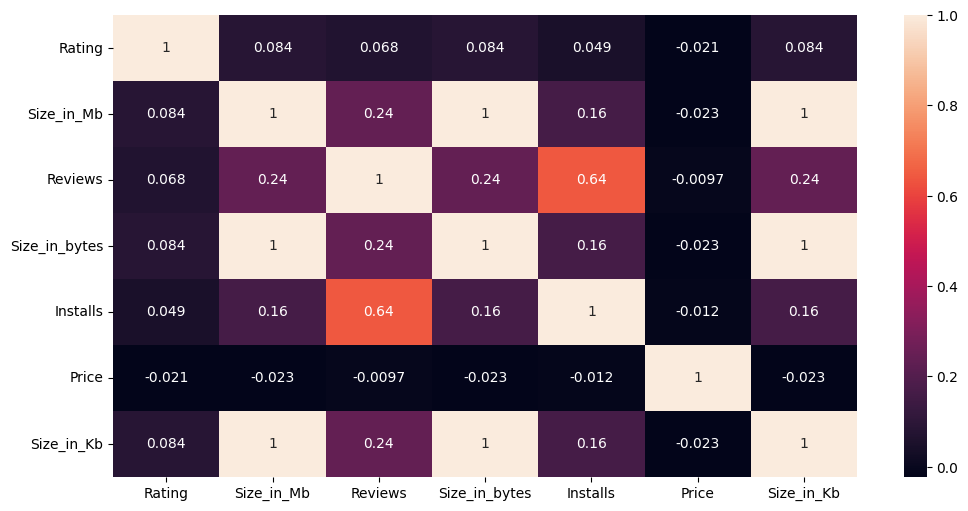

In [65]:
plt.figure(figsize=(12,6))
numeric_columns = ["Rating","Size_in_Mb","Reviews","Size_in_bytes","Installs","Price","Size_in_Kb"]
sns.heatmap(df[numeric_columns].corr(),annot=True)

> <div class="alert alert-block alert-success" style="color:darkgreen;">
<b>INFO:</b> Lighter color shows high correlation and Darker color shows low correlation.
</div>

In [66]:
df[numeric_columns].corr()

,Rating,Size_in_Mb,Reviews,Size_in_bytes,Installs,Price,Size_in_Kb
Rating,1.000000,0.083737,0.068141,0.083737,0.048685,-0.021176,0.083737
Size_in_Mb,0.083737,1.000000,0.238214,1.000000,0.164787,-0.023007,1.000000
Reviews,0.068141,0.238214,1.000000,0.238214,0.643122,-0.009667,0.238214
Size_in_bytes,0.083737,1.000000,0.238214,1.000000,0.164787,-0.023007,1.000000
Installs,0.048685,0.164787,0.643122,0.164787,1.000000,-0.011688,0.164787
Price,-0.021176,-0.023007,-0.009667,-0.023007,-0.011688,1.000000,-0.023007
Size_in_Kb,0.083737,1.000000,0.238214,1.000000,0.164787,-0.023007,1.000000


> <div class="alert alert-block alert-warning">
<b>Note:</b> We can see that Reviews column has high correlation with Installs column, which is 0.64.
</div>

<h3 align="left"> <font color='skyblue'>Let's calculate pearson correlation coefficient</font></h3>

In [67]:
# remove rows containing nan values(imp to calculate pearson's R) 
df_clean = df.dropna()

In [68]:
from scipy import stats

# calculate Pearson's R between Installs and Reviews
pearson_r = stats.pearsonr(df_clean['Installs'],df_clean['Reviews'])
print("pearson's R between Installs and Reviews")
pearson_r

pearson's R between Installs and Reviews


PearsonRResult(statistic=0.6193916210874723, pvalue=0.0)

In [69]:
print(len(df_clean))
print(len(df))

7683
10841


<h2 align="center"> <font color='green'>Dealing with Missing values </font></h2>

In [70]:
print(f"Length of the Dataframe : {len(df)}")

Length of the Dataframe : 10841


In [71]:
df.isna().sum().sort_values()

App                     0
Category                0
Installs                0
Price                   0
Genres                  0
Last Updated            0
Reviews                 1
Type                    1
Content Rating          1
Android Ver             3
Current Ver             8
Installs_category     130
Rating               1474
Size_in_bytes        1696
Size_in_Mb           1696
Size_in_Kb           1696
dtype: int64

In [72]:
df.dropna(subset= ['Current Ver','Android Ver','Content Rating','Type','Reviews'],inplace=True)

In [73]:
# Length after removing null values in some columns
len(df)

10829

In [74]:
df.isna().sum().sort_values()

App                     0
Category                0
Reviews                 0
Installs                0
Type                    0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             0
Android Ver             0
Installs_category     130
Rating               1469
Size_in_bytes        1694
Size_in_Mb           1694
Size_in_Kb           1694
dtype: int64

In [75]:
# Imputing
df['Installs_category'] = df['Installs_category'].fillna(df['Installs_category'].mode()[0])
df['Rating'] = df['Rating'].fillna(df['Rating'].median())
df['Size_in_bytes'] = df['Size_in_bytes'].fillna(df['Size_in_bytes'].mean())
df['Size_in_Mb'] = df['Size_in_Mb'].fillna(df['Size_in_Mb'].mean())
df['Size_in_Kb'] = df['Size_in_Kb'].fillna(df['Size_in_Kb'].mean())

In [76]:
df.isna().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size_in_bytes        0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
Size_in_Mb           0
Size_in_Kb           0
Installs_category    0
dtype: int64

In [77]:
df.groupby('Installs_category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Installs_category,,,,,,,,
No,548.0,4.349818,0.344691,1.0,4.3,4.3,4.3,5.0
Very low,923.0,4.328494,0.553886,1.0,4.3,4.3,4.4,5.0
Low,1235.0,4.145182,0.684689,1.0,4.0,4.3,4.5,5.0
Moderate,1528.0,4.050654,0.589984,1.4,3.8,4.2,4.5,5.0
More than moderate,1647.0,4.097146,0.501623,1.6,3.9,4.2,4.4,4.9
High,2246.0,4.213535,0.368763,1.8,4.0,4.3,4.5,4.9
Very high,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
Top notch,698.0,4.386533,0.192817,3.1,4.3,4.4,4.5,4.8


<a id="4"></a>
<p style="padding: 10px; background-color: #0B1E47; color: #ffffff; font-family: 'Times New Roman', serif; font-size: 1.5em; text-align: center; border: 3px solid #ffffff; border-radius: 15px 50px; margin: 0; font-weight: 500;">DATA VISUALIZATION</p>



In [78]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_Kb,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19922944.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,19456.0,Moderate
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14680064.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,14336.0,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,9122611.2,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,8908.8,Very high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,26214400.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,25600.0,Top notch
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2936012.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,2867.2,More than moderate


<div style="border-radius: 15px 0 15px 0px; border: 1px solid #ffffff; padding: 5px; background-color: #0B1E47; text-align: center; box-shadow: 0px 1px 2px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 18px;">1. Top 10 Apps based on Ratings</h2>
</div>


In [79]:
# Sort the DataFrame by the number of reviews in descending order and select the top 10
top_10_apps_rating = df.sort_values(by='Rating',ascending=False).head(10)

In [80]:
top_10_apps_rating[['App','Rating']].values.tolist()


[['BP Journal - Blood Pressure Diary', 5.0],
 ['Morse Player', 5.0],
 ['BI APP', 5.0],
 ['TI-84 CE Graphing Calculator Manual TI 84', 5.0],
 ['30WPM Amateur ham radio Koch CW Morse code trainer', 5.0],
 ['Oración CX', 5.0],
 ['cx advance call blocker', 5.0],
 ['FA Player Essentials', 5.0],
 ['Hojiboy Tojiboyev Life Hacks', 5.0],
 ['CE Smart', 5.0]]

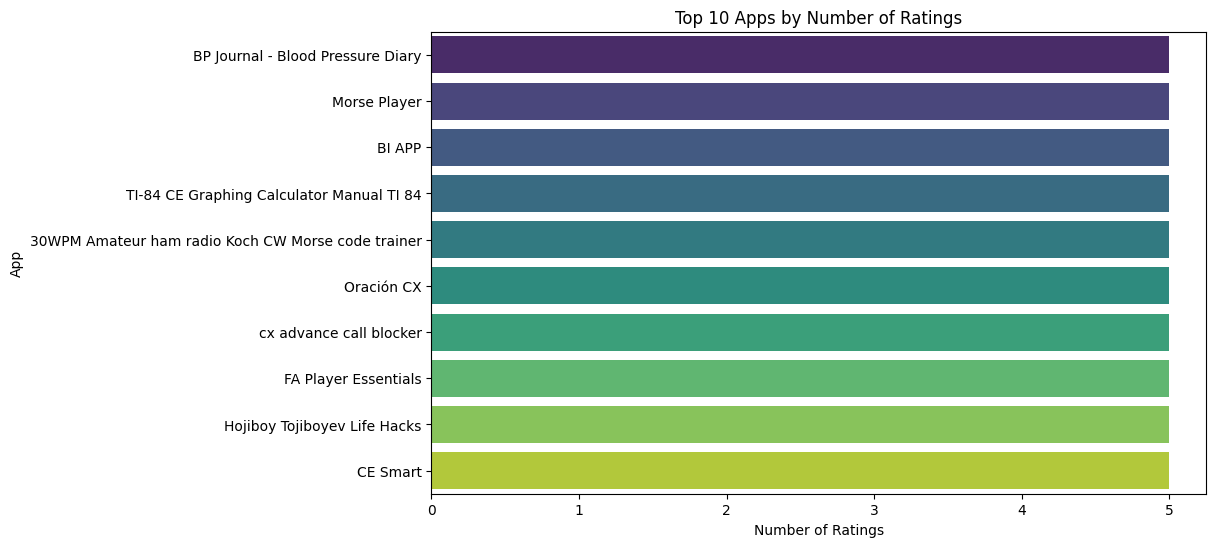

In [81]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_10_apps_rating , x='Rating' ,y='App',palette='viridis')
plt.title('Top 10 Apps by Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('App')
plt.show()

<div style="border-radius: 15px 0 15px 0px; border: 1px solid #ffffff; padding: 5px; background-color: #0B1E47; text-align: center; box-shadow: 0px 1px 2px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 18px;">2. Top 10 Apps based on Reviews</h2>
</div>


In [82]:
# first - sort values
top_10_apps_reviews = df.sort_values(by='Reviews',ascending=False)

In [83]:
# Drop duplicates from App column
top_10_apps_reviews = top_10_apps_reviews.drop_duplicates(subset='App')

In [84]:
# select top 10 using head(10)
top_10_apps_reviews = top_10_apps_reviews.head(10)

In [85]:
print(top_10_apps_reviews['App'].to_string(index=False))

                                          Facebook
                                WhatsApp Messenger
                                         Instagram
          Messenger – Text and Video Chat for Free
                                    Clash of Clans
           Clean Master- Space Cleaner & Antivirus
                                    Subway Surfers
                                           YouTube
Security Master - Antivirus, VPN, AppLock, Booster
                                      Clash Royale


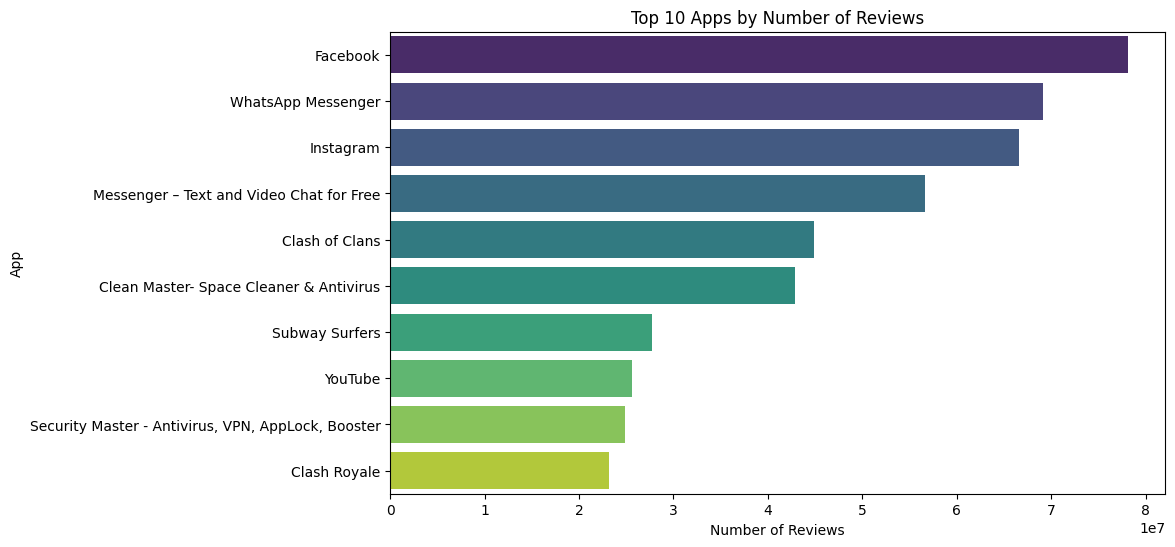

In [86]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_10_apps_reviews , x='Reviews' ,y='App',palette='viridis')
plt.title('Top 10 Apps by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('App')
plt.show()

<div style="border-radius: 15px 0 15px 0px; border: 1px solid #ffffff; padding: 5px; background-color: #0B1E47; text-align: center; box-shadow: 0px 1px 2px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 18px;">3. Most used 5 categories of App</h2>
</div>


In [87]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [88]:
# count the occurence
most_category = df['Category'].value_counts()

In [89]:
most_5_category = most_category.head(5)
most_5_category

Category
FAMILY      1968
GAME        1144
TOOLS        841
MEDICAL      463
BUSINESS     460
Name: count, dtype: int64

In [90]:
# no of occurence
most_5_category.values

array([1968, 1144,  841,  463,  460])

In [91]:
most_5_category.index

Index(['FAMILY', 'GAME', 'TOOLS', 'MEDICAL', 'BUSINESS'], dtype='object', name='Category')

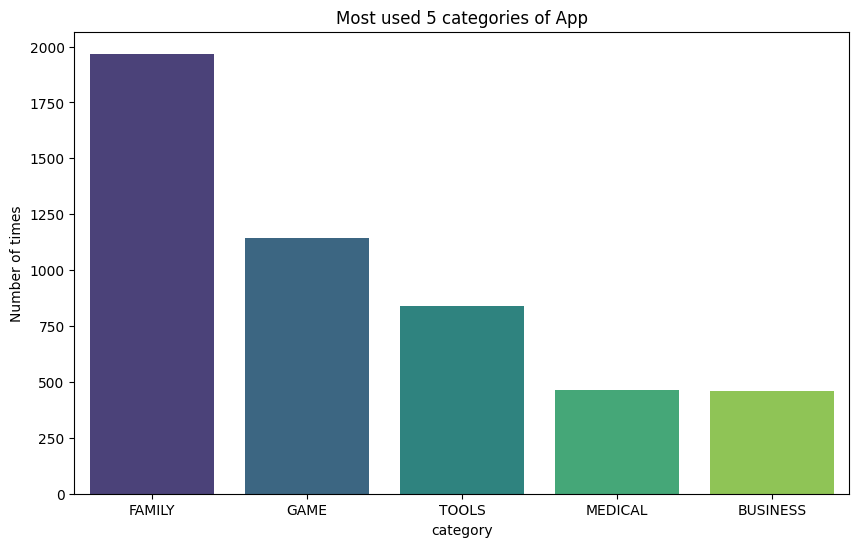

In [92]:
plt.figure(figsize=(10,6))
sns.barplot(x=most_5_category.index ,y=most_5_category.values ,palette='viridis')
plt.title('Most used 5 categories of App')
plt.ylabel('Number of times')
plt.xlabel('category')
plt.show()

<div style="border-radius: 15px 0 15px 0px; border: 1px solid #ffffff; padding: 5px; background-color: #0B1E47; text-align: center; box-shadow: 0px 1px 2px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 18px;">4. Which genres most of the App belong to ?</h2>
</div>


In [93]:
most_genres = df['Genres'].value_counts()
most_5_genres = most_genres.head(5)
most_5_genres

Genres
Tools            840
Entertainment    622
Education        548
Medical          463
Business         460
Name: count, dtype: int64

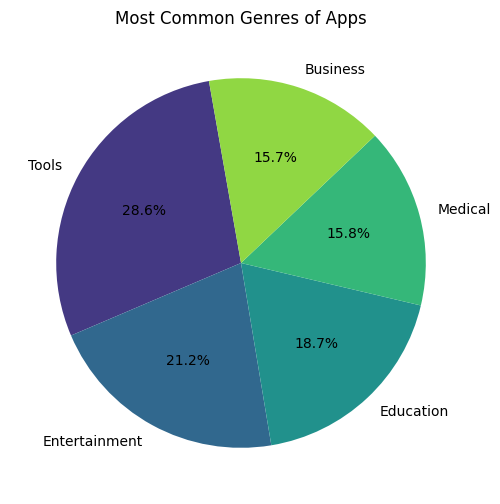

In [94]:
# Plotting the pie chart
plt.figure(figsize=(10, 6))
most_5_genres.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('viridis',5),startangle=100)
plt.title('Most Common Genres of Apps')
plt.ylabel('')
plt.show()

<div style="border-radius: 15px 0 15px 0px; border: 1px solid #ffffff; padding: 5px; background-color: #0B1E47; text-align: center; box-shadow: 0px 1px 2px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 18px;">5. which type of App widely on playstore</h2>
</div>


In [95]:
df['Type'].value_counts()

Type
Free    10032
Paid      797
Name: count, dtype: int64

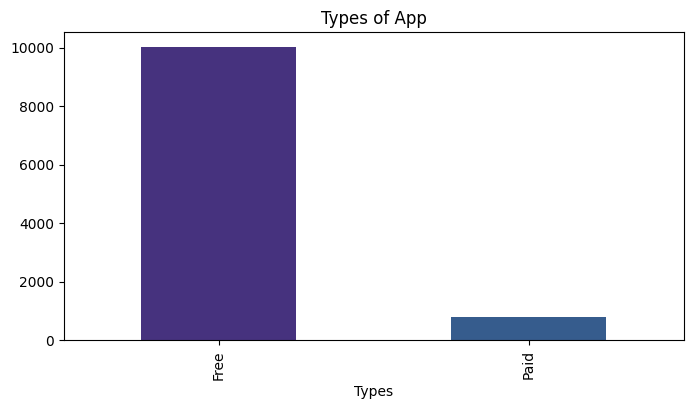

In [96]:
most_type = df['Type'].value_counts()

plt.figure(figsize=(8,4))
most_type.plot(kind='bar',color=sns.color_palette('viridis'))
plt.title('Types of App')
plt.ylabel('')
plt.xlabel('Types')
plt.show()

<div style="border-radius: 15px 0 15px 0px; border: 1px solid #ffffff; padding: 5px; background-color: #0B1E47; text-align: center; box-shadow: 0px 1px 2px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 18px;">6. No.of Apps for different age groups of people</h2>
</div>


In [97]:
no_age_groups = df['Content Rating'].value_counts()
no_age_groups

Content Rating
Everyone           8704
Teen               1208
Mature 17+          499
Everyone 10+        413
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

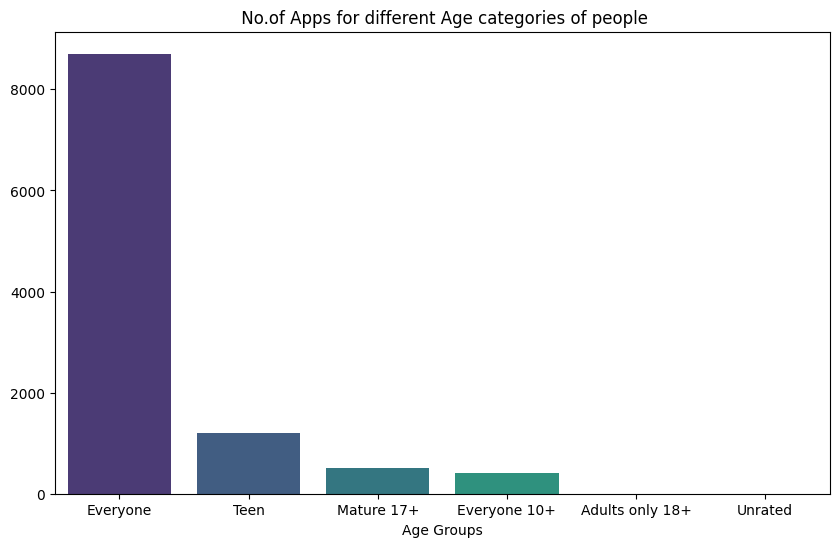

In [98]:
plt.figure(figsize=(10,6))
sns.barplot(x=no_age_groups.index ,y=no_age_groups.values ,palette='viridis')
plt.title(' No.of Apps for different Age categories of people')
plt.ylabel('')
plt.xlabel('Age Groups')
plt.show()

In [99]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_Kb,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19922944.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,19456.0,Moderate
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14680064.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,14336.0,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,9122611.2,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,8908.8,Very high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,26214400.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,25600.0,Top notch
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2936012.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,2867.2,More than moderate
